# **Project 5: Wine Quality Prediction using Random Forest**

**Objective:**

To predict wine quality scores based on physicochemical properties such as acidity, alcohol content, and sugar levels.

To apply Random Forest regression for non-linear feature interaction modeling.

To determine the most influential chemical properties affecting perceived wine quality.

To validate model robustness and interpret feature importances.

**Problem Type:**
Regression (Continuous target variable — Wine Quality Score)

**🔧 Evaluation Metrics:**

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

R² Score (Coefficient of Determination)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/drive/MyDrive/QIP_IIIT_A/Learning/Model Projects/Random Forest/winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(6463, 13)

# **Exploratory Data Anslytics**

**Univariate Analysis (Feature Distributions)**

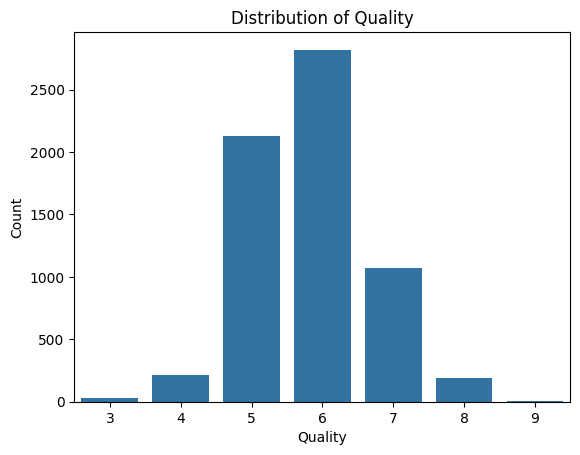

In [8]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

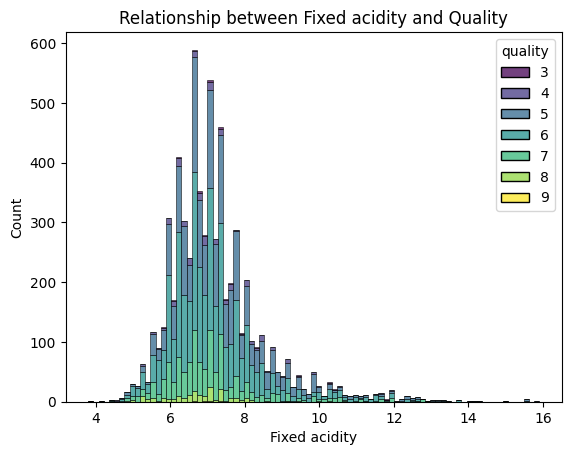

In [9]:
sns.histplot(x='fixed acidity', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Fixed acidity and Quality')
plt.xlabel('Fixed acidity')
plt.ylabel('Count')
plt.show()

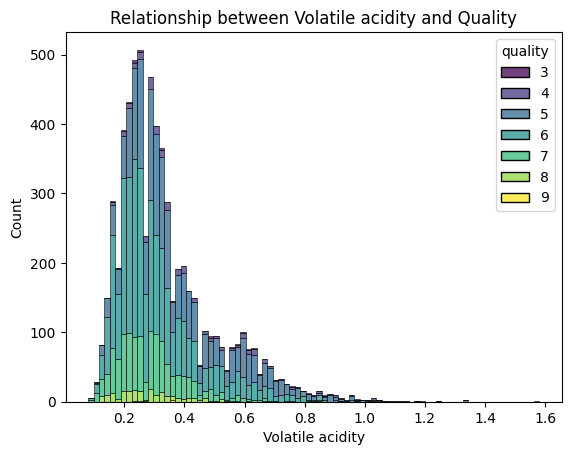

In [10]:
sns.histplot(x='volatile acidity', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Volatile acidity and Quality')
plt.xlabel('Volatile acidity')
plt.ylabel('Count')
plt.show()

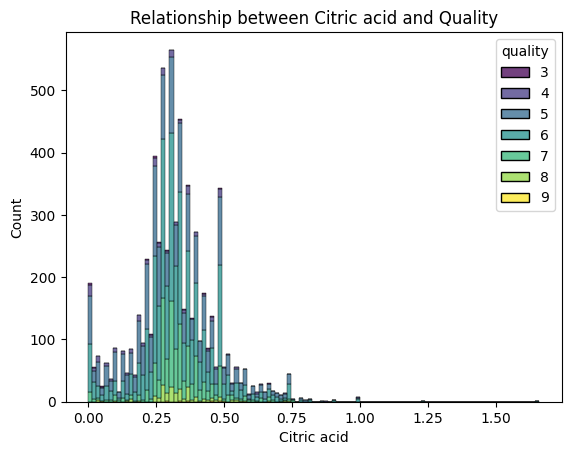

In [11]:
sns.histplot(x='citric acid', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Citric acid and Quality')
plt.xlabel('Citric acid')
plt.ylabel('Count')
plt.show()

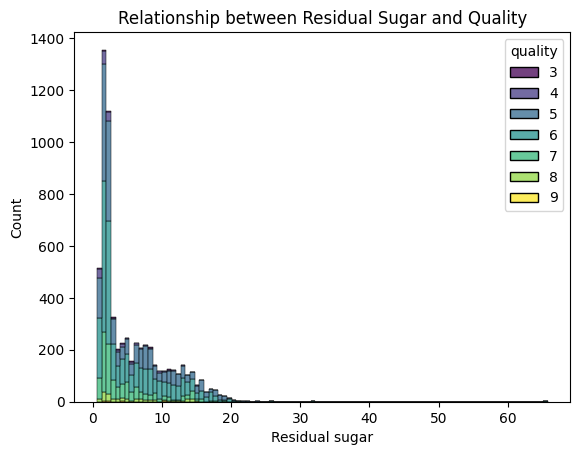

In [12]:
sns.histplot(x='residual sugar', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Residual Sugar and Quality')
plt.xlabel('Residual sugar')
plt.ylabel('Count')
plt.show()

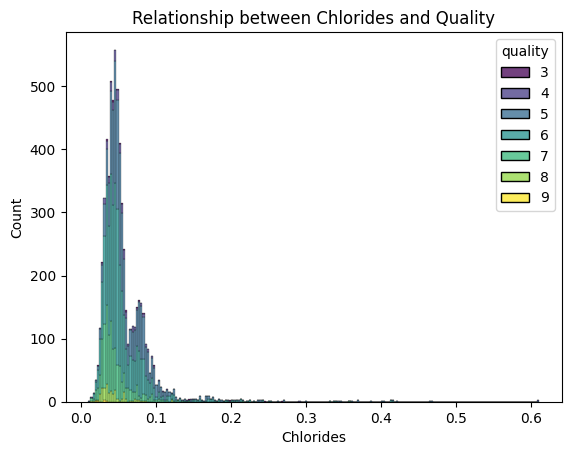

In [13]:
sns.histplot(x='chlorides', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Chlorides and Quality')
plt.xlabel('Chlorides')
plt.ylabel('Count')
plt.show()

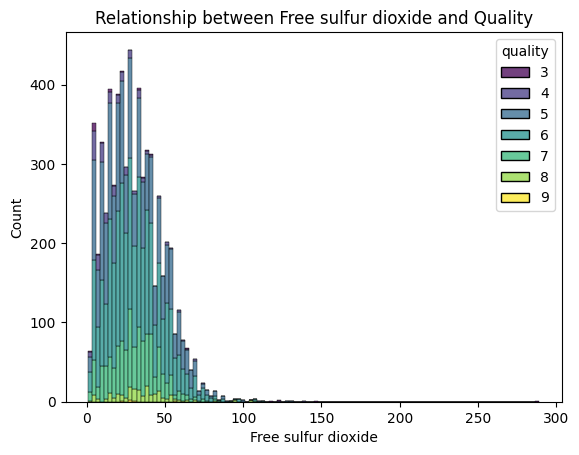

In [14]:
sns.histplot(x='free sulfur dioxide', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Free sulfur dioxide and Quality')
plt.xlabel('Free sulfur dioxide')
plt.ylabel('Count')
plt.show()

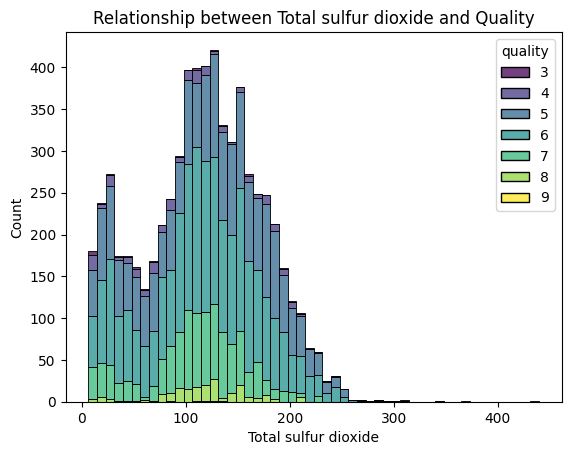

In [15]:
sns.histplot(x='total sulfur dioxide', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Total sulfur dioxide and Quality')
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Count')
plt.show()

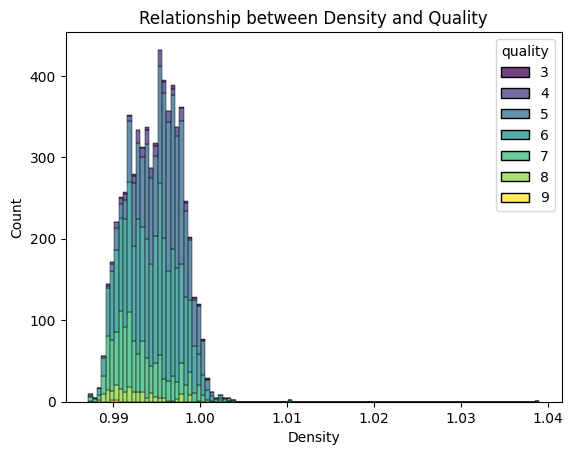

In [16]:
sns.histplot(x='density', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Density and Quality')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()

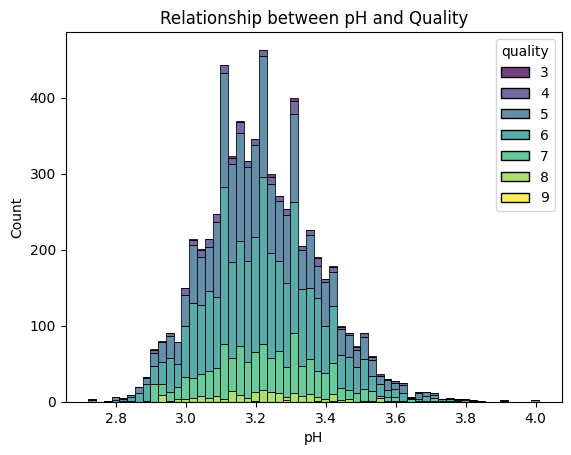

In [17]:
sns.histplot(x='pH', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between pH and Quality')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

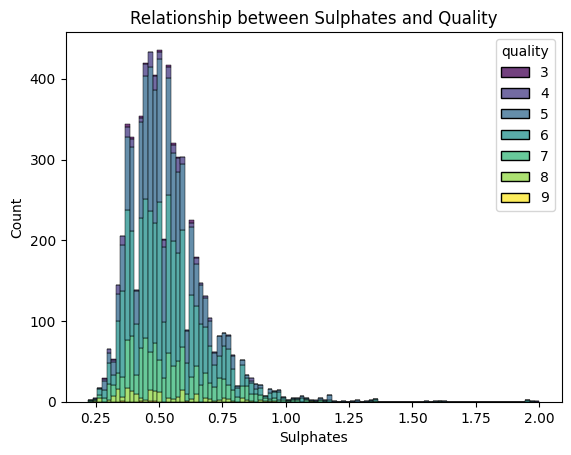

In [18]:
sns.histplot(x='sulphates', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Sulphates and Quality')
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.show()

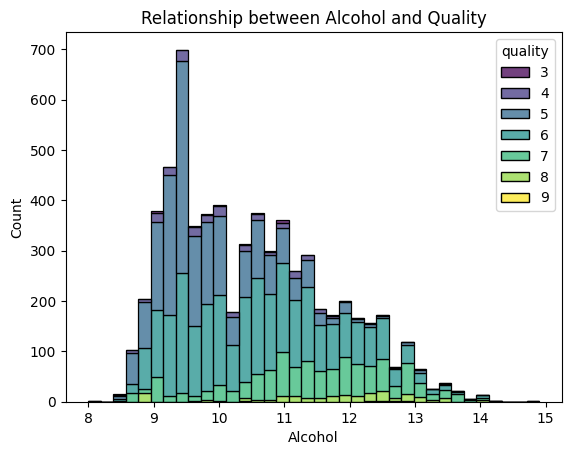

In [19]:
sns.histplot(x='alcohol', hue='quality', data=df, multiple='stack', palette='viridis')
plt.title('Relationship between Alcohol and Quality')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

In [20]:
#sns.histplot(x='type', hue='quality', data=df, multiple='stack', palette='viridis')
#plt.title('Relationship between Type and Quality')
#plt.xlabel('Type')
#plt.ylabel('Count')
#plt.show()

**Bivariate Analysis**

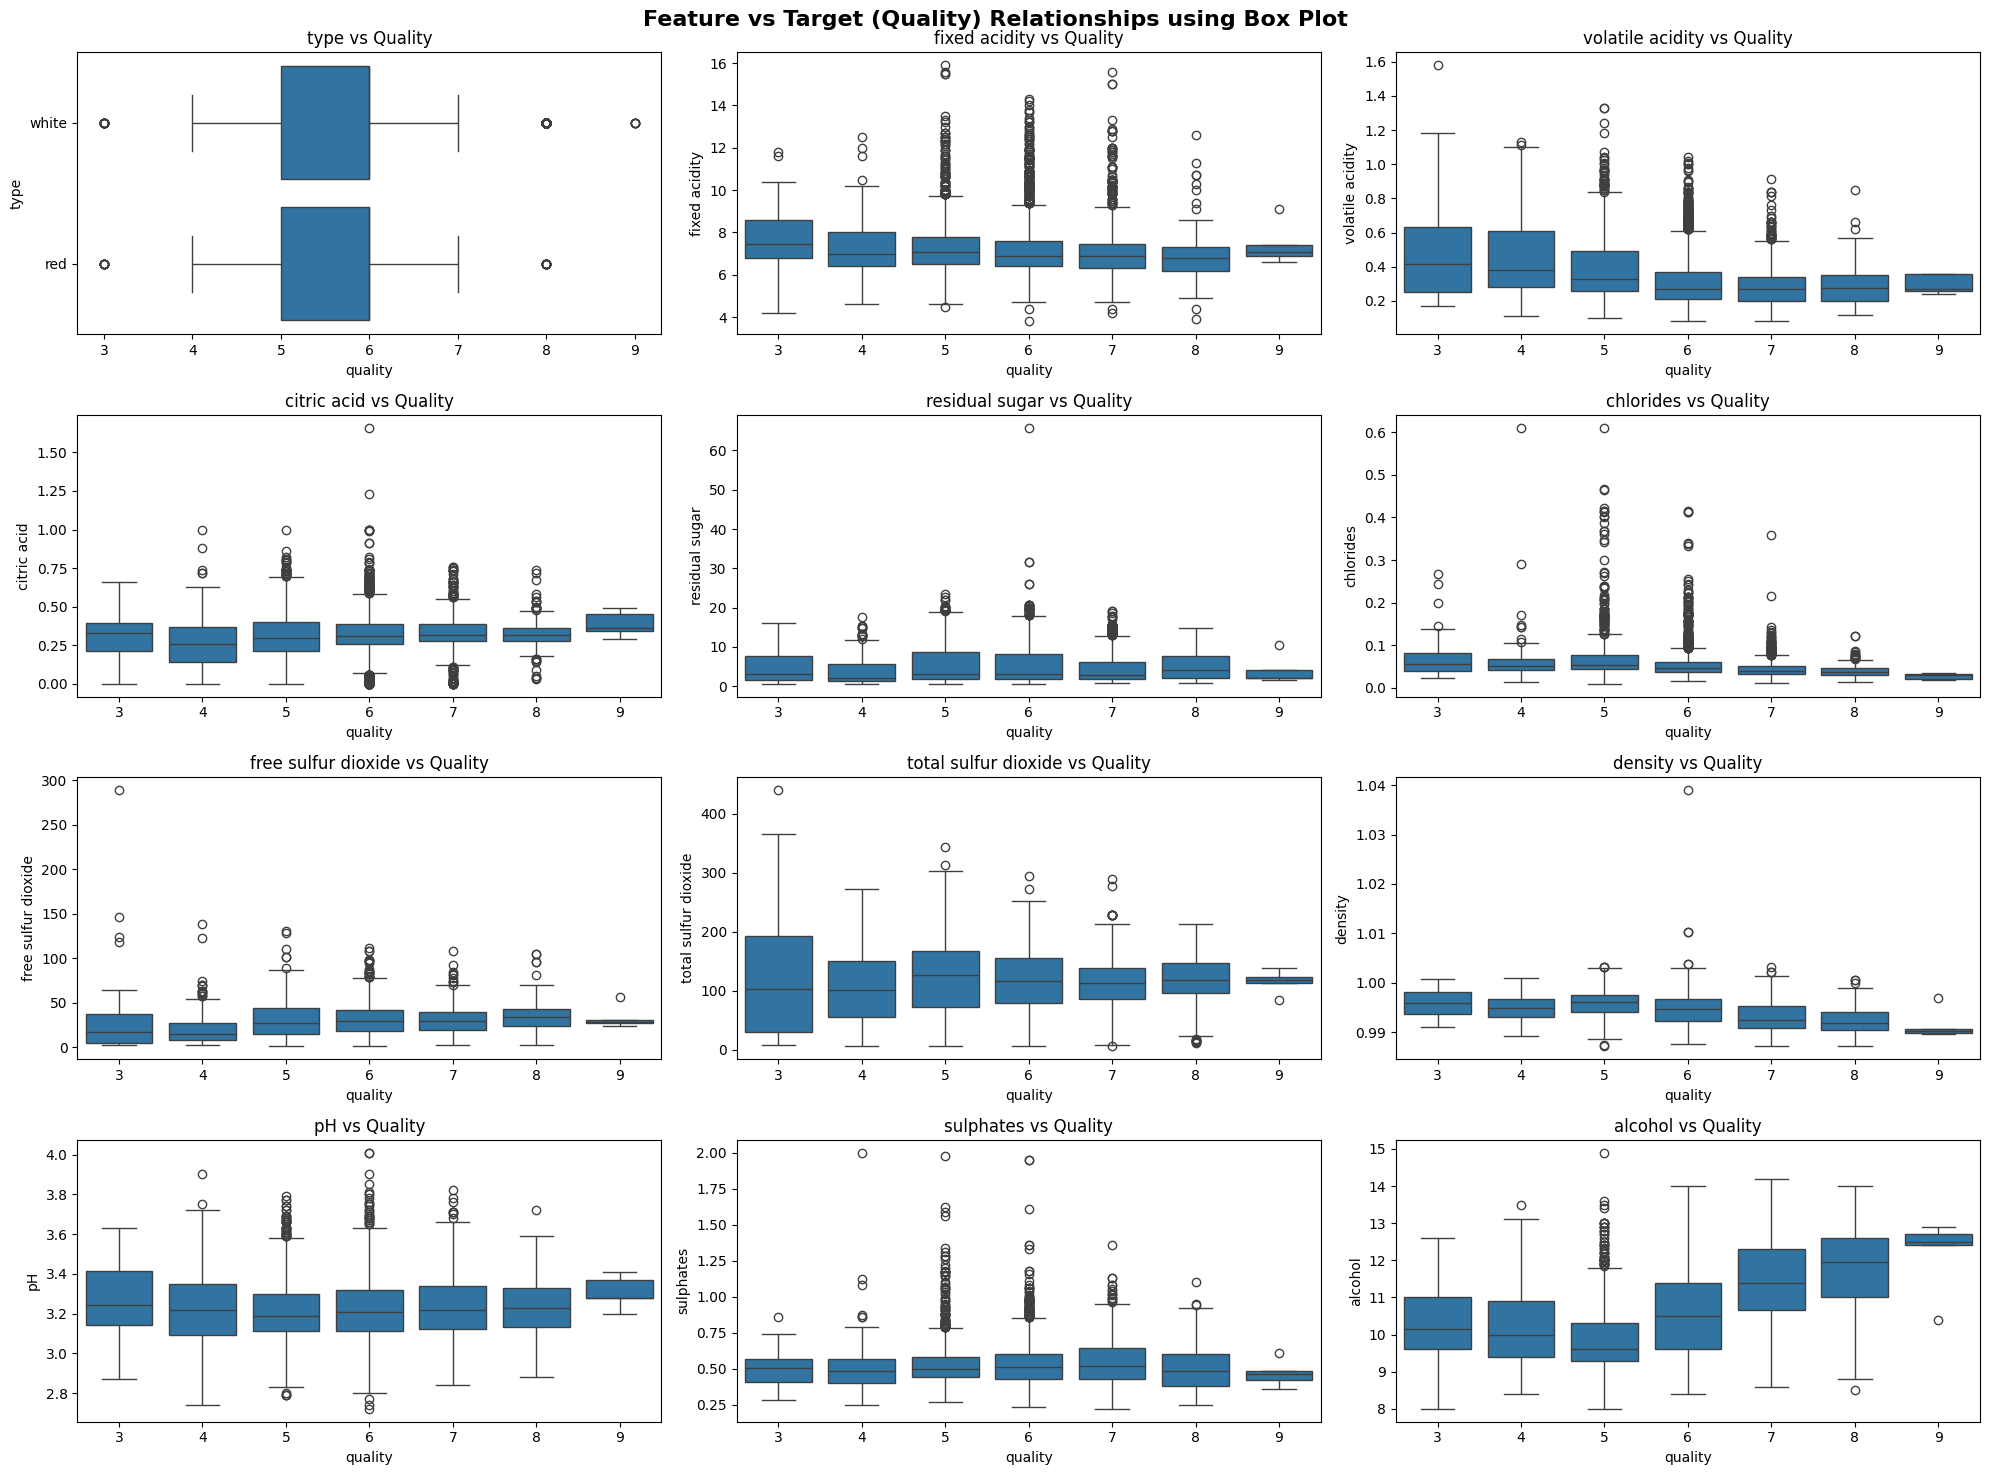

In [21]:
features = [col for col in df.columns if col != 'quality']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for feature, ax in zip(features, axes.flat):
    sns.boxplot(x='quality', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} vs Quality')

fig.suptitle("Feature vs Target (Quality) Relationships using Box Plot", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

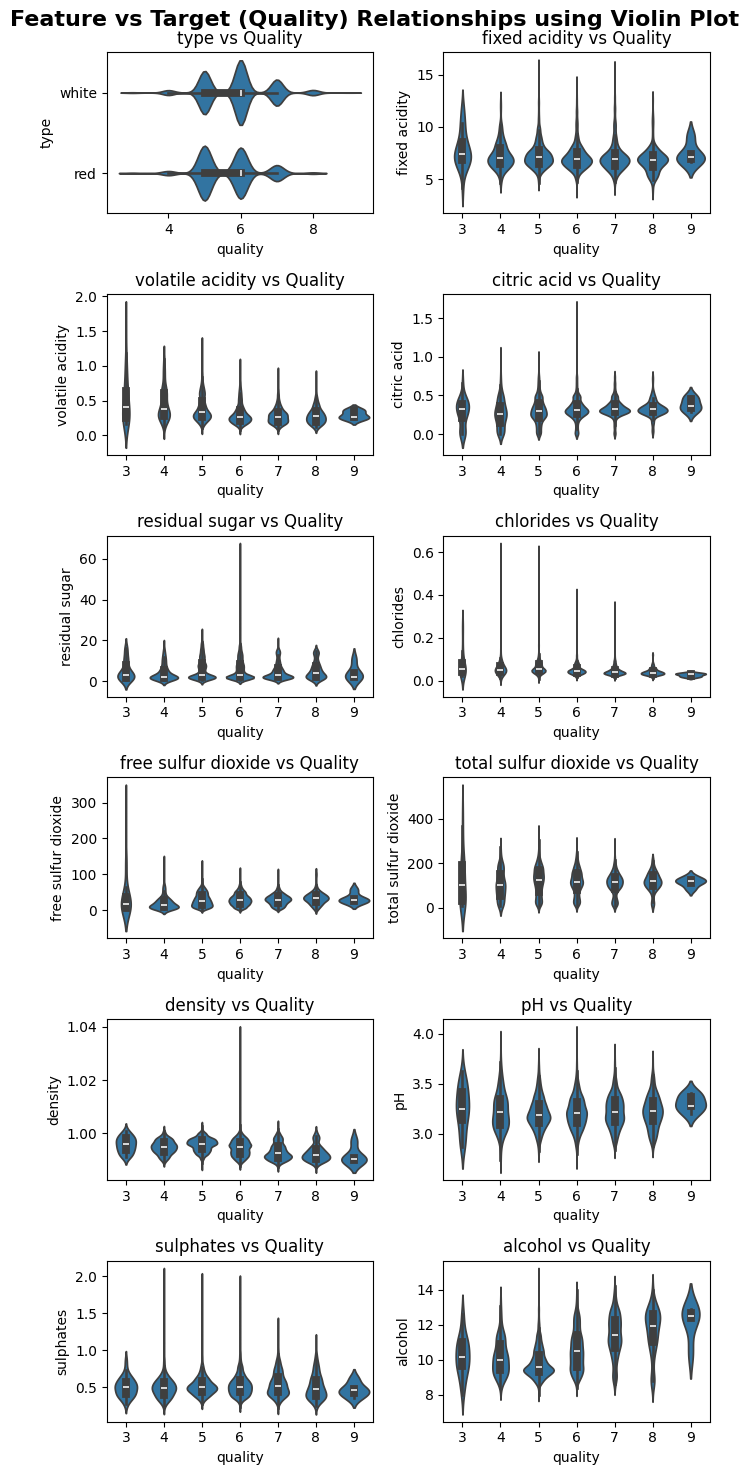

In [22]:
features = [col for col in df.columns if col != 'quality']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(7, 15))

for feature, ax in zip(features, axes.flat):
    sns.violinplot(x='quality', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} vs Quality')

fig.suptitle("Feature vs Target (Quality) Relationships using Violin Plot", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [23]:
df['type'] = df['type'].replace({'white': 1, 'red': 2})

/tmp/ipython-input-313621260.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({'white': 1, 'red': 2})


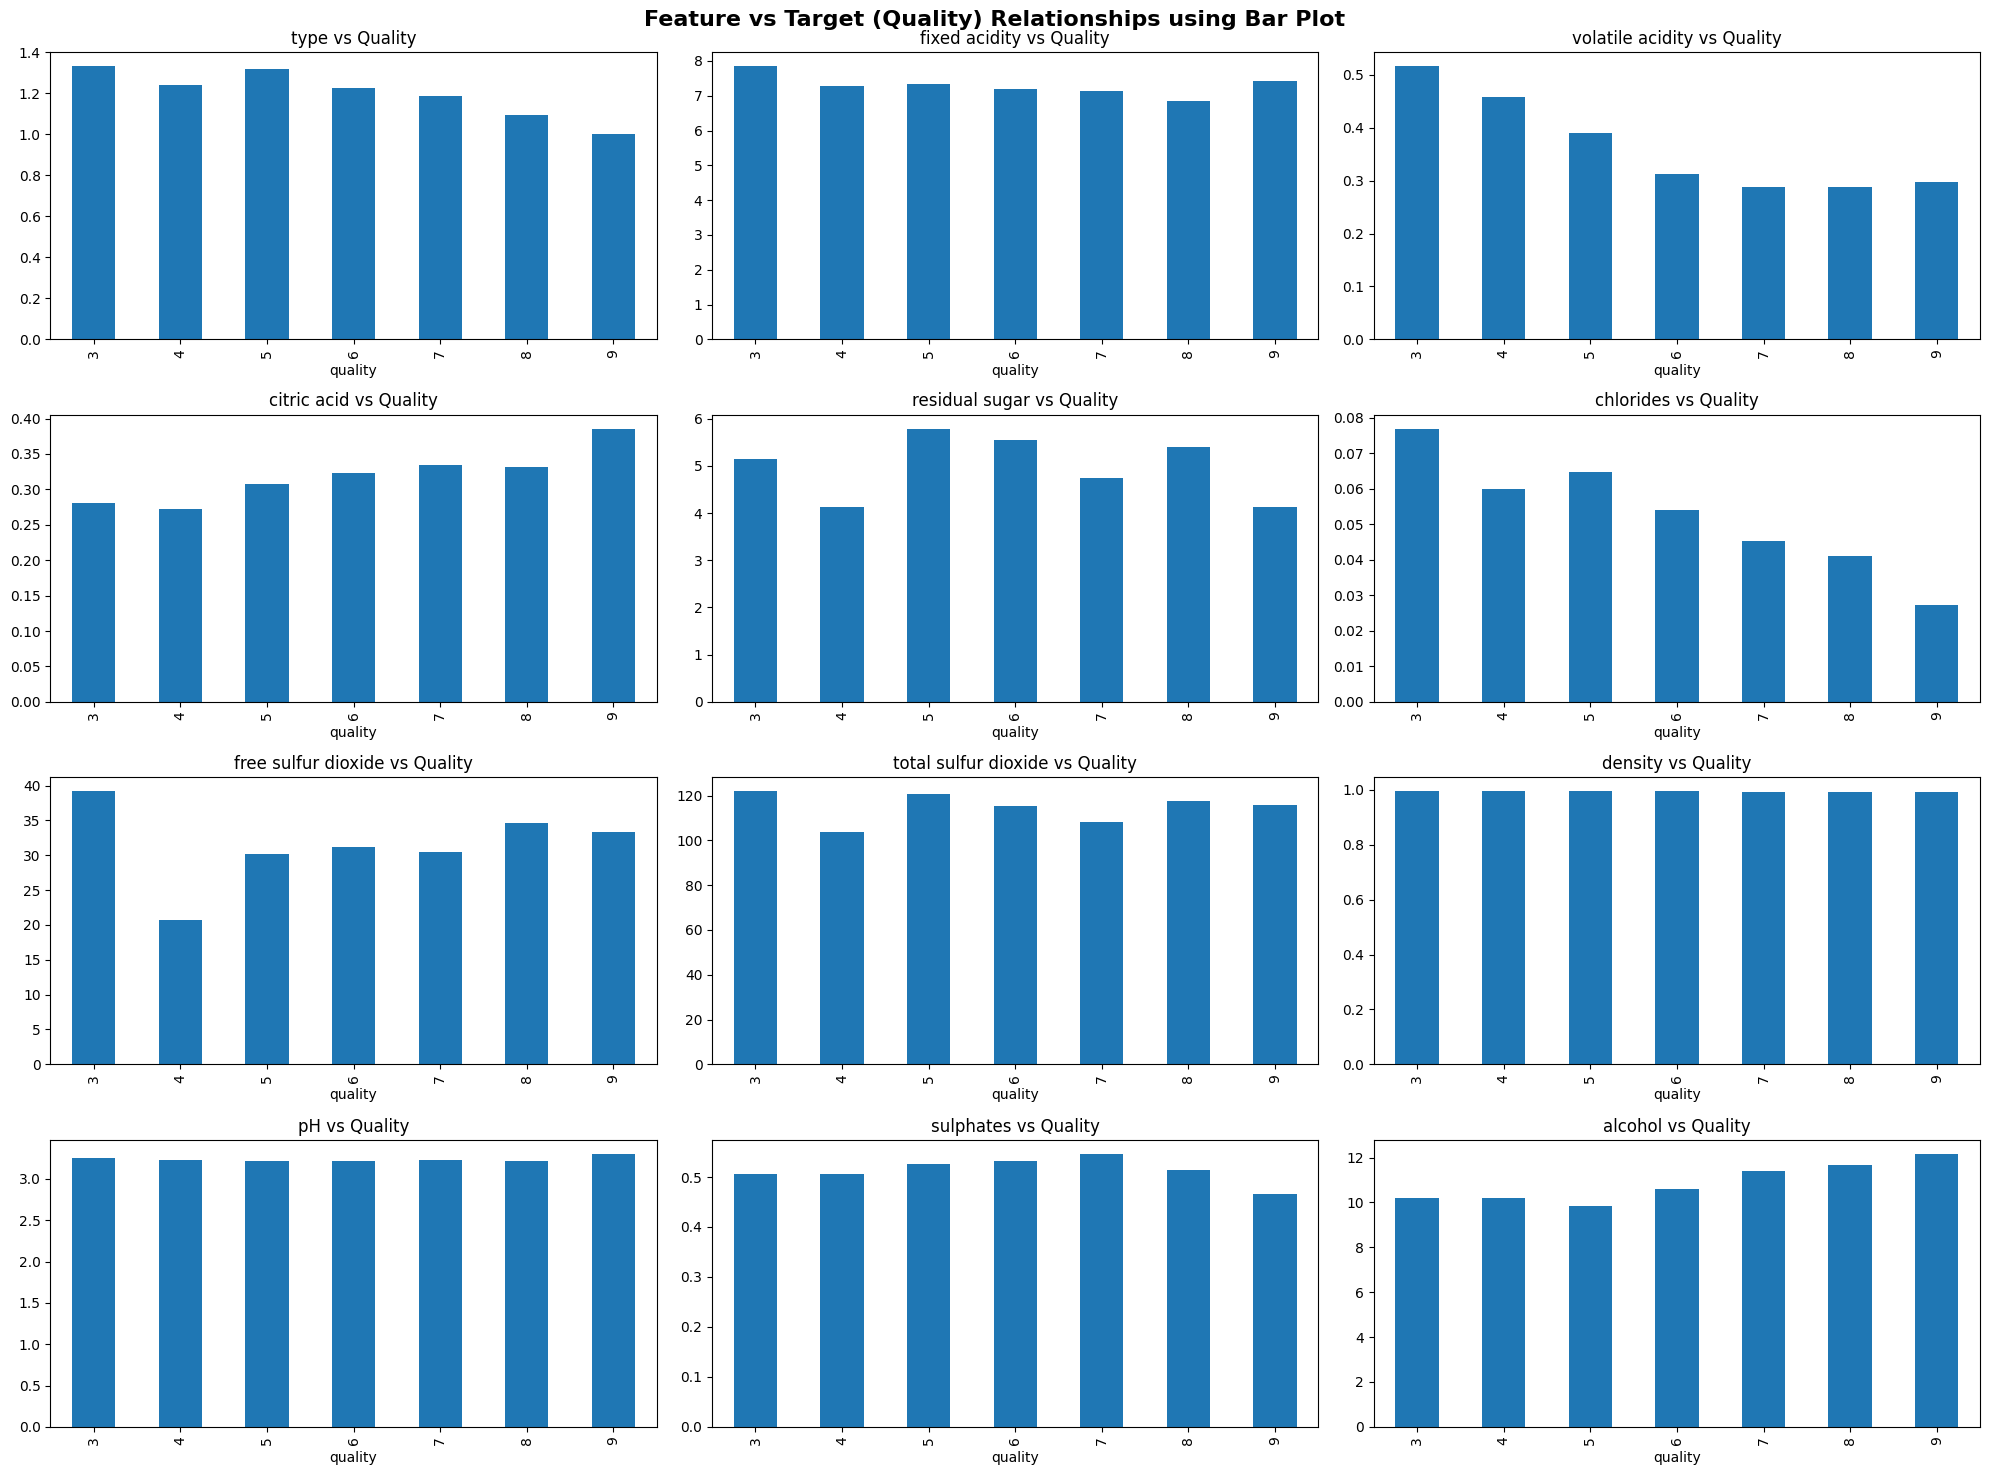

In [24]:
features = [col for col in df.columns if col != 'quality']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for feature, ax in zip(features, axes.flat):
    df.groupby('quality').mean()[feature].plot(kind='bar', ax=ax)
    ax.set_title(f'{feature} vs Quality')

fig.suptitle("Feature vs Target (Quality) Relationships using Bar Plot", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


**Pairplot**

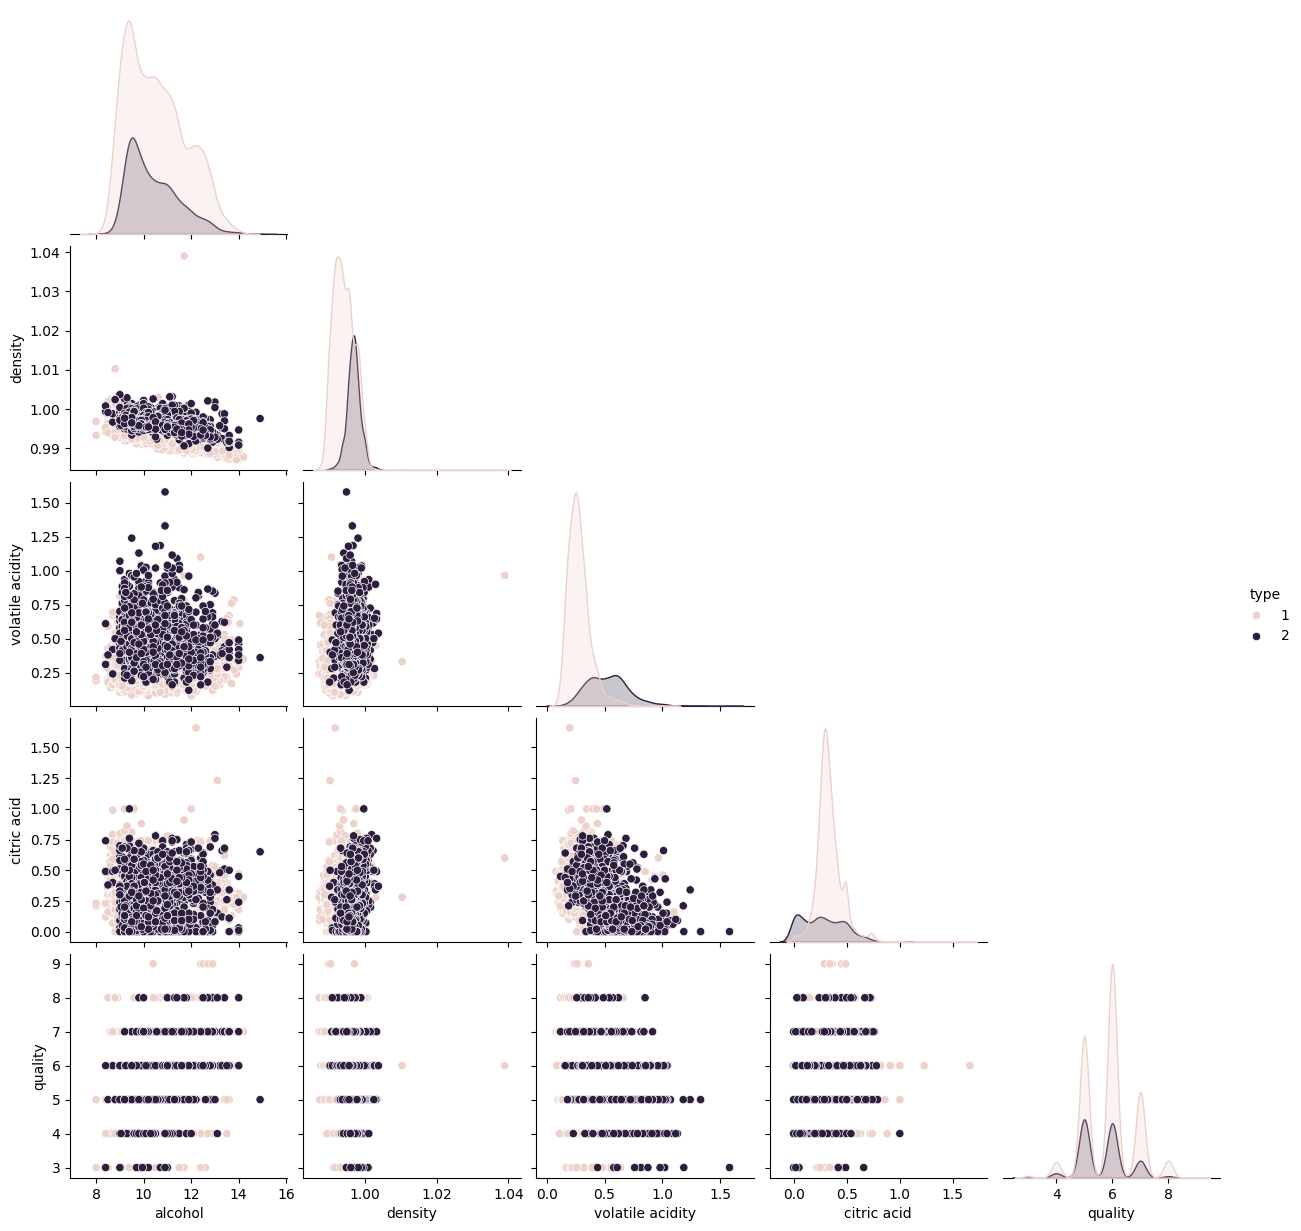

In [25]:
sns.pairplot(df, vars=['alcohol', 'density', 'volatile acidity', 'citric acid', 'quality'], hue='type', corner=True)

**Correlation Matrix + Heatmap**

<Axes: >

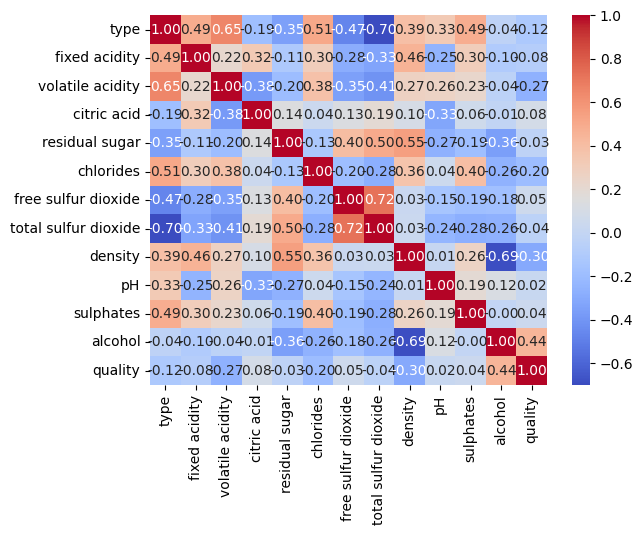

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# **Model Building & Evaluation**

In [27]:
x= df.drop(['free sulfur dioxide', 'quality'], axis=1)
y = df['quality']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [29]:
model = RandomForestClassifier(random_state=12)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=12)

In [30]:
y_pred = model.predict(x_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6937354988399071

Confusion Matrix:
 [[  0   0   2   4   1   0]
 [  0   2  17  19   0   0]
 [  0   2 312 113   5   0]
 [  0   2  90 435  34   1]
 [  0   0   7  71 131   0]
 [  0   0   0  17  11  17]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.05      0.09        38
           5       0.73      0.72      0.73       432
           6       0.66      0.77      0.71       562
           7       0.72      0.63      0.67       209
           8       0.94      0.38      0.54        45

    accuracy                           0.69      1293
   macro avg       0.56      0.43      0.46      1293
weighted avg       0.69      0.69      0.68      1293



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


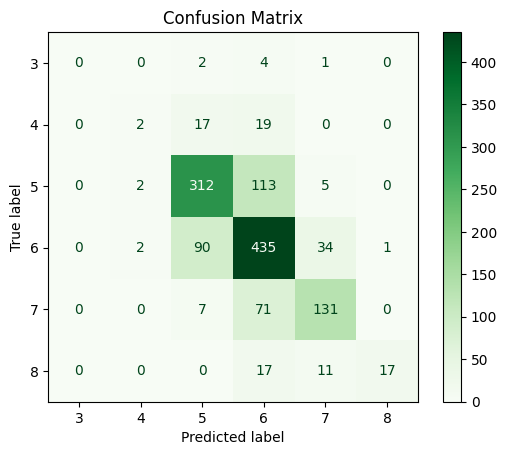

In [32]:
# 1. Compute the raw confusion matrix
cm = confusion_matrix(y_test, y_pred)

display_labels = [3, 4, 5, 6, 7, 8]

# 3. Create the display object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# You can customize the color map here as well
disp.plot(cmap="Greens") # or 'Blues', 'Oranges', etc.
plt.title('Confusion Matrix')
plt.show()

**Feature Importance**

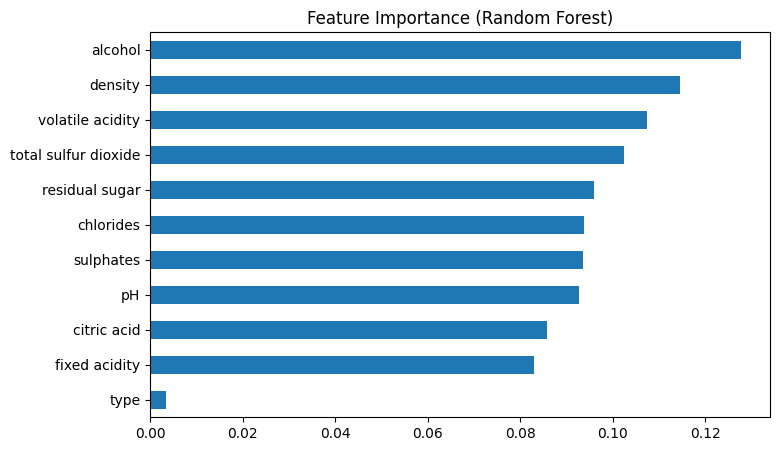

In [33]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

**Permutation Importance**

In [34]:
from sklearn.inspection import permutation_importance
feature_importance = permutation_importance(model, x, y, n_repeats=10, random_state=12)

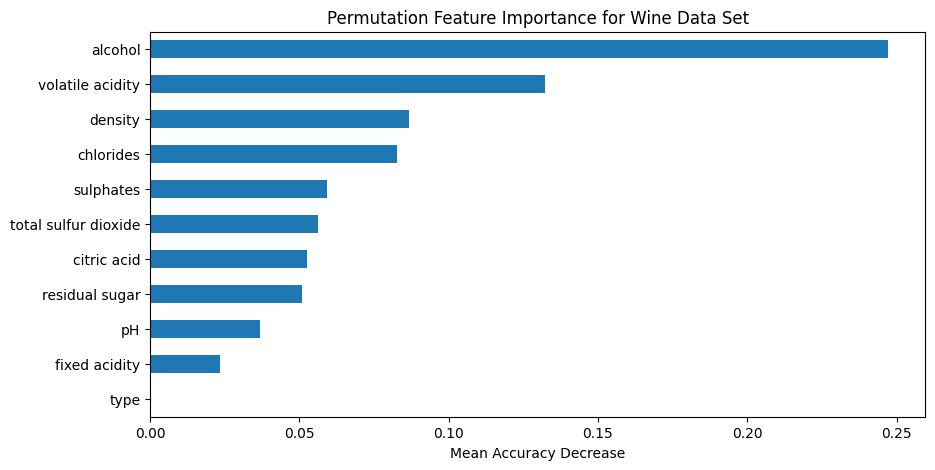

In [48]:
# Permutation Feature Importance (Visualization)
perm_importances = pd.Series(feature_importance.importances_mean, index=x.columns)
perm_importances = perm_importances.sort_values(ascending=True)

plt.figure(figsize=(10,5))
perm_importances.plot(kind='barh')
plt.title('Permutation Feature Importance for Wine Data Set')
plt.xlabel('Mean Accuracy Decrease')
plt.show()


# **Visualization**

In [36]:
y_prob = model.predict_proba(x_test)

In [37]:
from sklearn.preprocessing import label_binarize
classes=np.sort(df['quality'].unique())
y_test_bin = label_binarize(y_test, classes=classes)

In [38]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, cls in enumerate(classes):
    if y_test_bin[:, i].sum() == 0:
        print(f"Skipping class {cls} — no positive samples in test set")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Skipping class 9 — no positive samples in test set


In [39]:
# Merge all FPR points (only from valid classes)
all_fpr = np.unique(
    np.concatenate([fpr[i] for i in range(len(classes)) if y_test_bin[:, i].sum() != 0])
)

# Interpolate mean TPR
mean_tpr = np.zeros_like(all_fpr)
valid_class_count = 0

for i, cls in enumerate(classes):
    if y_test_bin[:, i].sum() == 0:
        print(f"Skipping class {cls} — no positive samples in test set")
        continue
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    valid_class_count += 1

# Average only over valid classes
mean_tpr /= valid_class_count

# Compute macro-average AUC
roc_auc["macro"] = auc(all_fpr, mean_tpr)

Skipping class 9 — no positive samples in test set


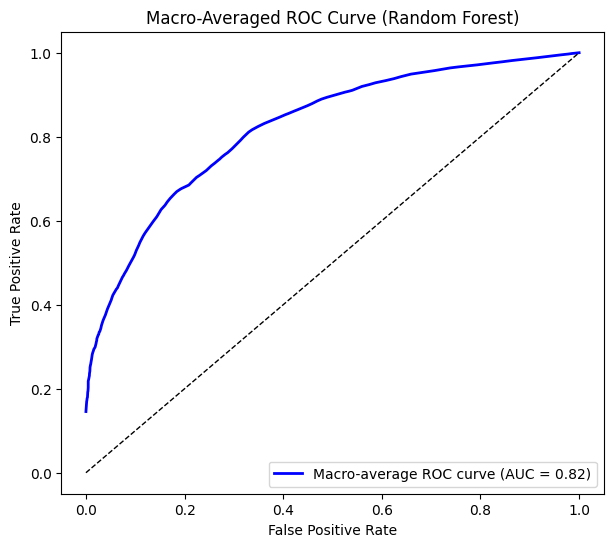

In [40]:
plt.figure(figsize=(7, 6))
plt.plot(all_fpr, mean_tpr, color='blue', lw=2,
         label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
avg_precision = {}

for i, cls in enumerate(classes):
  if y_test_bin[:, i].sum() == 0:
        print(f"Skipping class {cls} — no positive samples in test set")
        continue
  precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
  avg_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

Skipping class 9 — no positive samples in test set


In [42]:
avg_precision_macro = np.mean(list(avg_precision.values()))

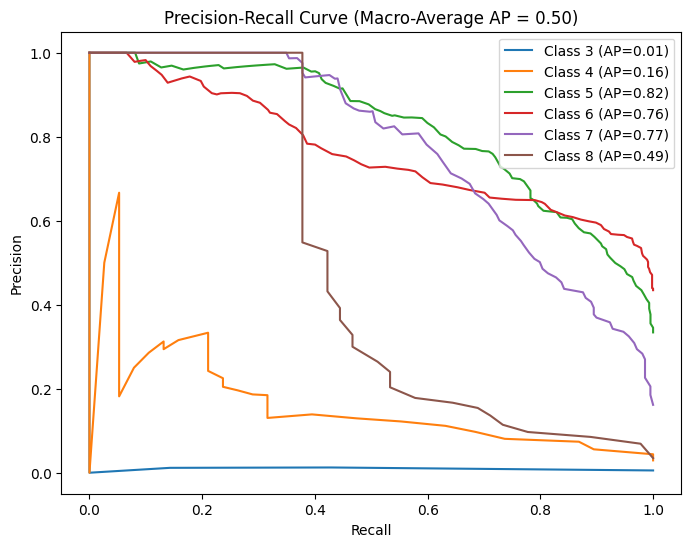

In [43]:
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    if i in precision:  # ensure not skipped
        plt.plot(recall[i], precision[i], label=f'Class {cls} (AP={avg_precision[i]:.2f})')
plt.title(f'Precision-Recall Curve (Macro-Average AP = {avg_precision_macro:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [44]:
class_list = [3, 4, 5, 6, 7, 8]
for value, precision in zip(class_list, avg_precision.values()):
  print(f"Precision Score of class {value} is {precision:.2f}")

Precision Score of class 3 is 0.01
Precision Score of class 4 is 0.16
Precision Score of class 5 is 0.82
Precision Score of class 6 is 0.76
Precision Score of class 7 is 0.77
Precision Score of class 8 is 0.49


[ 413 1344 2274 3205 4136]


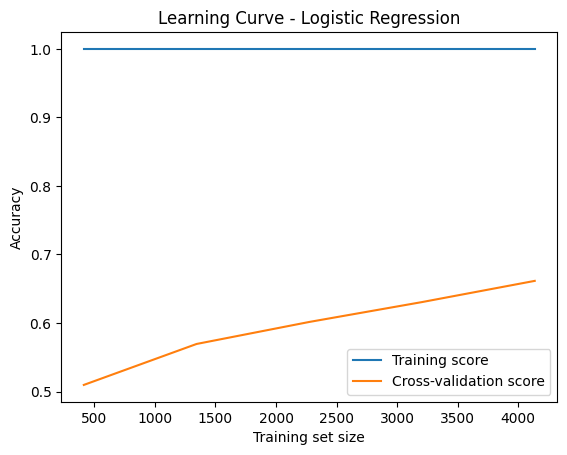

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')
print(train_sizes)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.show()

In [46]:
rf_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_bal.fit(x_train, y_train)
y_pred_bal = rf_bal.predict(x_test)

print("Accuracy (balanced):", rf_bal.score(x_test, y_test))
print(classification_report(y_test, y_pred_bal))

Accuracy (balanced): 0.6875483372003094
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.43      0.08      0.13        38
           5       0.72      0.72      0.72       432
           6       0.65      0.78      0.71       562
           7       0.74      0.57      0.64       209
           8       1.00      0.38      0.55        45

    accuracy                           0.69      1293
   macro avg       0.59      0.42      0.46      1293
weighted avg       0.69      0.69      0.68      1293



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
